In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.linear_model
import sklearn.model_selection
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [2]:
# baja y lee los datos
training = torchvision.datasets.FashionMNIST(root="./", train=True, download=True)
train_loader = torch.utils.data.DataLoader(training,shuffle=True)

testing = torchvision.datasets.FashionMNIST(root="./", train=False, download=True, 
                                            transform=torchvision.transforms.Normalize((0), (1.0)))
testing_loader = torch.utils.data.DataLoader(testing, shuffle=True)

torch.Size([60000, 28, 28])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


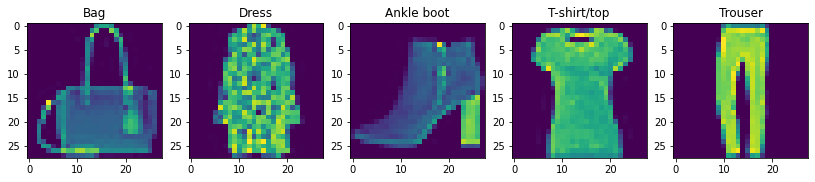

In [3]:
print(train_loader.dataset.data.size())
print(train_loader.dataset.classes)
n_items = train_loader.dataset.data.size()[0]
random_items = np.random.choice(np.arange(n_items), 5)

plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    item  = random_items[i]
    plt.imshow(train_loader.dataset.data[item])
    plt.title(train_loader.dataset.classes[train_loader.dataset.targets[item]] )

In [4]:
# Selecciona y normaliza 600 para entrenar
train  = train_loader.dataset.data[:600].float()
target = train_loader.dataset.targets[:600].float()

mean = train.mean(dim=0)
std = train.std(dim=0)
std[std==0]=1.0

for i in range(len(train)):
    train[i] = (train[i]-mean)/std
np.shape(train)

torch.Size([600, 28, 28])

In [5]:
x_train = train.unsqueeze(1)
model = torch.nn.Sequential(
   torch.nn.Conv2d(1, 4, 4, stride=1),
    torch.nn.Conv2d(4, 2, 3, stride=2),
    torch.nn.Conv2d(2,1,4,stride=2),
    torch.nn.Flatten(),    
   torch.nn.Linear(25,10)
)  # in-channels = 1, out-channels = 4, kernel=4
inputs = torch.autograd.Variable(torch.Tensor(x_train).float())
new_tensor = model(inputs)
print(new_tensor.size())

torch.Size([600, 10])


In [6]:
epochs=200
optimizer = torch.optim.SGD(model.parameters(), lr=0.13)
criterion = torch.nn.CrossEntropyLoss()
loss_values = np.zeros(epochs)
F1_values_train = np.zeros(epochs)

In [7]:
for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(x_train).float())
    targets = torch.autograd.Variable(torch.Tensor(target).long())
    
    optimizer.zero_grad()
    out = model(inputs)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    
    values, Y_predicted = torch.max(out.data, 1)
    loss_values[epoch] = loss.item()
    F1_values_train[epoch] = sklearn.metrics.f1_score(target, Y_predicted, average='macro')

Text(0, 0.5, 'loss')

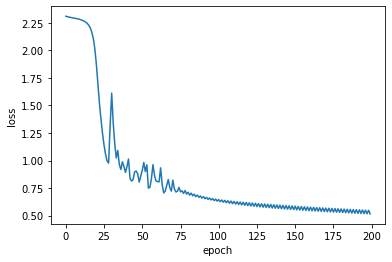

In [8]:
plt.plot(np.arange(epochs), loss_values)
plt.xlabel('epoch')
plt.ylabel('loss')

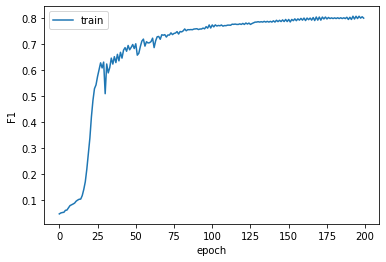

In [9]:
plt.plot(np.arange(epochs), F1_values_train, label='train')
plt.xlabel('epoch')
plt.ylabel('F1')
plt.legend()